# **HW 1**
청년 AI, BigData 아카데미 27기 컴퓨터비전 강의 HW1  
Due: 24.09.12(Thu.) 23:59  

2 Questions (HW1-1, HW1-2)

## **HW1-1 Build Simple CNN**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchsummary import summary 

### Data Loading and Preprocessing

In [25]:
# transform 정의
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# load dataset 
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader 생성
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

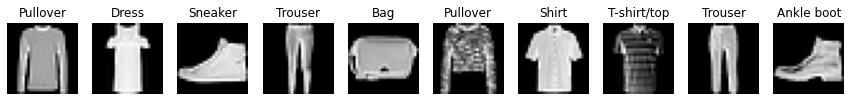

In [26]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터셋의 첫 번째 배치
data_iter = iter(train_loader)
images, labels =  next(data_iter)

# 이미지를 다시 원래 범위로 변환
images = images * 0.5 + 0.5  # 역정규화

# show first 10 images
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    ax = axes[i]
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(classes[labels[i]])
    ax.axis('off')

plt.show()

### Build the CNN model

In [28]:
# CNN model with 2 convolution layers 
#    1. 32 3x3 filters, padding="same", input_shape = (28, 28, 1), activation="relu"
#    2. 64 3x3 filters, activation="relu"
# and max pooling layer with size=2
# and 2 dense layers (128, 10)
#    3. 128, activation="relu"
#    4. 10, activation="softmax"

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        ###############################################
        # Implement code here


        
        
        ###############################################

    def forward(self, x):
        ###############################################
        # Implement code here
        x = 
        x = 
        x = 
        x = 
        x = 
        x = 

        ###############################################
        return x

# Instantiate the model
model = CNNModel()

# summary
model = model.cuda()
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 26, 26]          18,496
         MaxPool2d-3           [-1, 64, 13, 13]               0
           Flatten-4                [-1, 10816]               0
            Linear-5                  [-1, 128]       1,384,576
            Linear-6                   [-1, 10]           1,290
Total params: 1,404,682
Trainable params: 1,404,682
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.69
Params size (MB): 5.36
Estimated Total Size (MB): 6.05
----------------------------------------------------------------


### Loss Function and Optimizer

In [29]:
# Loss = Cross Entropy Loss, Optimizer = Adam, learning rate = 0.001
criterion = # Implement code here
optimizer = # Implement code here

### Model Training

In [43]:
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    loss_history = []  # List to store loss for each epoch
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        loss_history.append(epoch_loss)  # Store the average loss for the epoch
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')
    
    return loss_history  # Return the loss history

# Train the model and get the loss history
loss_history = # Implement code here

Epoch [1/10], Loss: 1.4879
Epoch [2/10], Loss: 1.4870
Epoch [3/10], Loss: 1.4863
Epoch [4/10], Loss: 1.4862
Epoch [5/10], Loss: 1.4871
Epoch [6/10], Loss: 1.4859
Epoch [7/10], Loss: 1.4846
Epoch [8/10], Loss: 1.4843
Epoch [9/10], Loss: 1.4839
Epoch [10/10], Loss: 1.4852


### Plot the loss

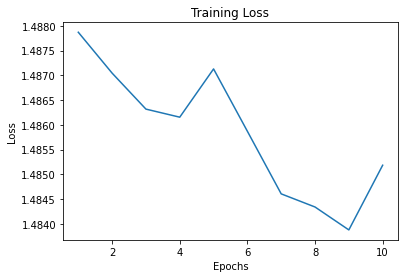

In [44]:
plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Model Evaluation

In [45]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Evaluate the model
# Implement code here

Test Accuracy: 92.07%


## **HW1-2 AlexNet implementation**

In [26]:
#!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [46]:
import torch
import torch.nn as nn
import torch.optim as optim

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

from torchsummary import summary
import pytorch_lightning as pl
from torchmetrics import Accuracy

if torch.cuda.is_available(): device = torch.device('cuda')
else: device = torch.device('cpu')

### Define data module
* Use MNIST dataset

In [47]:
class MNIST_DataModule(pl.LightningDataModule):
    # initialization
    def __init__(self, batch_size, transform):
        super().__init__()
        self.batch_size = batch_size
        self.transform = transform

    # Make Train/Test dataset
    def setup(self, stage=None):
        if stage == 'fit' or stage == None:
            self.train_data = # implement code here
     
        if stage == 'test' or stage == None:
            self.test_data = # implement code here

    # Return train dataloader
    def train_dataloader(self):
        return # implement code here
    
    # Return test dataloader
    def test_dataloader(self):
        return # implement code here

In [48]:
##implement dataset and dataloader
data_module = # implement code here
# implement code here   # setup the data module

### Implement AlexNet
* The structure and specification is given in the 221202_HW1.pdf file

In [51]:
class Net(pl.LightningModule):
    def __init__(self, model='resnet18', freeze=False):
        super().__init__()
        self.model = # implement code here
        self.loss = # apply cross entropy loss
        self.accuracy = # apply Accuracy function
        
    def _build_model(self, name, freeze):
        if name == 'alexnet':
            ## Implement AlexNet #######################
            conv_block1 = nn.Sequential()
            conv_block2 = nn.Sequential()

            conv_layer1 = nn.Sequential()
            conv_layer2 = nn.Sequential()
            conv_layer3 = nn.Sequential()

            pooling = 
            flatten = 
            fc_layer1 = nn.Sequential()
            fc_layer2 = nn.Sequential()
            fc_layer3 = 
            ############################################

            model = nn.ModuleList([conv_block1, conv_block2, conv_layer1, conv_layer2, conv_layer3,
                                    pooling, flatten, fc_layer1, fc_layer2, fc_layer3])
            
            if freeze == True:
                for params in model.parameters():
                    params.require_grad = False
                
            return model
        
    def forward(self, x):
        for layer in self.model:
            x = layer(x)
        return x
    
    def training_step(self, batch, batch_idx):
        ###############################################
        # Implement code here
        # 1. define x, y
        # 2. forward-pass x
        # 3. calculate loss
        # 4. produce prediction using torch.argmax() to output
        # 5. calculate accuracy
        
        
        ###############################################

        self.log('train_loss', loss, on_step=True, on_epoch=True, logger=True)
        self.log('train_acc', acc, on_step=True, on_epoch=True, logger=True)
        
        return loss
    
    def test_step(self, batch, batch_idx):
        ###############################################
        # Implement code here
        # 1. define x, y
        # 2. forward-pass x
        # 3. calculate loss
        # 4. produce prediction using torch.argmax() to output
        # 5. calculate accuracy
        

        ###############################################
        
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', acc, prog_bar=True)
        
        return loss

    def configure_optimizers(self):
        return # return adam optimizer


In [52]:
model = # call alexnet, set freeze false
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 28, 28]           2,496
              ReLU-2           [-1, 96, 28, 28]               0
         MaxPool2d-3           [-1, 96, 14, 14]               0
            Conv2d-4          [-1, 256, 14, 14]         614,656
              ReLU-5          [-1, 256, 14, 14]               0
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 384, 7, 7]         885,120
              ReLU-8            [-1, 384, 7, 7]               0
            Conv2d-9            [-1, 384, 7, 7]       1,327,488
             ReLU-10            [-1, 384, 7, 7]               0
           Conv2d-11            [-1, 256, 7, 7]         884,992
             ReLU-12            [-1, 256, 7, 7]               0
        MaxPool2d-13            [-1, 256, 3, 3]               0
          Flatten-14                 [-

In [53]:
trainer = # call trainer
# execute test (to compare the result after training)

GPU available: True (cuda), used: True
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('CUDA GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Missing logger folder: /home/work/AI_CV/HW1/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2024-09-09 01:24:32.699814: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from differ

Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.10279999673366547
        test_loss            2.302518129348755
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 2.302518129348755, 'test_acc': 0.10279999673366547}]

In [54]:
# fit(train) the model


You are using a CUDA device ('CUDA GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type               | Params
------------------------------------------------
0 | model    | ModuleList         | 17.4 M
1 | loss     | CrossEntropyLoss   | 0     
2 | accuracy | MulticlassAccuracy | 0     
------------------------------------------------
17.4 M    Trainable params
0         Non-trainable params
17.4 M    Total params
69.446    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [55]:
# test the model

You are using a CUDA device ('CUDA GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9746000170707703
        test_loss           0.09115520864725113
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.09115520864725113, 'test_acc': 0.9746000170707703}]

### Write down the test loss and test accuracy before/after training.  

[Before Train]  
test_loss:  
test_acc:  

[After Train]  
test_loss:  
test_acc:  